In [9]:
# Performance Profiling Comparative Analysis Charts
# This notebook generates comparative charts for optimized vs. unoptimized performance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set the style for all charts
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Colors for consistent styling
UNOPTIMIZED_COLOR = "#cc0000"  # Red for unoptimized
OPTIMIZED_COLOR = "#3465a4"    # Blue for optimized
GRID_COLOR = "#dddddd"
BACKGROUND_COLOR = "#ffffff"

# Files to process - CHANGE THESE to match your file names
unoptimized_file = "../server_performance_initial_load.csv"
optimized_file = "../server_performance_optimized_load.csv"

# Load the data
print(f"Loading unoptimized data from: {unoptimized_file}")
df_unopt = pd.read_csv(unoptimized_file)
df_unopt['timestamp'] = pd.to_datetime(df_unopt['timestamp'])

print(f"Loading optimized data from: {optimized_file}")
df_opt = pd.read_csv(optimized_file)
df_opt['timestamp'] = pd.to_datetime(df_opt['timestamp'])

# Calculate elapsed time in seconds for each dataset
def calculate_elapsed_seconds(df):
    start_time = df['timestamp'].min()
    df['elapsed_seconds'] = [(t - start_time).total_seconds() for t in df['timestamp']]
    return df

df_unopt = calculate_elapsed_seconds(df_unopt)
df_opt = calculate_elapsed_seconds(df_opt)

# Format time for x-axis labels
def format_time(x, pos=None):
    hours, remainder = divmod(x, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(minutes):02d}:{int(seconds):02d}"

Loading unoptimized data from: ../server_performance_initial_load.csv
Loading optimized data from: ../server_performance_optimized_load.csv


In [10]:
# Figure 28: CPU Usage – Unoptimized vs. Optimized
def plot_cpu_comparison():
    plt.figure(figsize=(10, 6))
    
    # Plot both datasets
    plt.plot(df_unopt['elapsed_seconds'], df_unopt['cpu_percent'], 
             color=UNOPTIMIZED_COLOR, linewidth=2, label='Unoptimized')
    plt.plot(df_opt['elapsed_seconds'], df_opt['cpu_percent'], 
             color=OPTIMIZED_COLOR, linewidth=2, label='Optimized')
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    
    # Set background color
    plt.gca().set_facecolor(BACKGROUND_COLOR)
    
    # Format the x-axis to show elapsed time
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_time))
    
    # Add labels and title
    plt.xlabel('Elapsed Time (MM:SS)', fontweight='bold')
    plt.ylabel('CPU Usage (%)', fontweight='bold')
    plt.title('Figure 28: CPU Usage – Unoptimized vs. Optimized', fontsize=14, fontweight='bold')
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Add border around the plot
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#888888')
        spine.set_linewidth(1.5)
    
    # Ensure y-axis starts at 0
    plt.ylim(bottom=0)
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig('cpu_usage_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
# Figure 29: Memory Usage Comparison – Unoptimized vs. Optimized
def plot_memory_comparison():
    plt.figure(figsize=(10, 6))
    
    # Plot both datasets
    plt.plot(df_unopt['elapsed_seconds'], df_unopt['mem_mb'], 
             color=UNOPTIMIZED_COLOR, linewidth=2, label='Unoptimized')
    plt.plot(df_opt['elapsed_seconds'], df_opt['mem_mb'], 
             color=OPTIMIZED_COLOR, linewidth=2, label='Optimized')
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    
    # Set background color
    plt.gca().set_facecolor(BACKGROUND_COLOR)
    
    # Format the x-axis to show elapsed time
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_time))
    
    # Add labels and title
    plt.xlabel('Elapsed Time (MM:SS)', fontweight='bold')
    plt.ylabel('Memory Usage (MB)', fontweight='bold')
    plt.title('Figure 29: Memory Usage Comparison – Unoptimized vs. Optimized', fontsize=14, fontweight='bold')
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Add border around the plot
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#888888')
        spine.set_linewidth(1.5)
    
    # Ensure y-axis starts at 0
    plt.ylim(bottom=0)
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig('memory_usage_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

In [12]:
# Figure 30: Thread Count Stability – Before and After Optimization
def plot_thread_comparison():
    plt.figure(figsize=(10, 6))
    
    # Plot both datasets
    plt.plot(df_unopt['elapsed_seconds'], df_unopt['num_threads'], 
             color=UNOPTIMIZED_COLOR, linewidth=2, label='Unoptimized')
    plt.plot(df_opt['elapsed_seconds'], df_opt['num_threads'], 
             color=OPTIMIZED_COLOR, linewidth=2, label='Optimized')
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    
    # Set background color
    plt.gca().set_facecolor(BACKGROUND_COLOR)
    
    # Format the x-axis to show elapsed time
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_time))
    
    # Add labels and title
    plt.xlabel('Elapsed Time (MM:SS)', fontweight='bold')
    plt.ylabel('Number of Threads', fontweight='bold')
    plt.title('Figure 30: Thread Count Stability – Before and After Optimization', fontsize=14, fontweight='bold')
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Add border around the plot
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#888888')
        spine.set_linewidth(1.5)
    
    # Ensure y-axis starts at 0
    plt.ylim(bottom=0)
    
    # Use integer ticks for thread count
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig('thread_count_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

In [17]:
# Figure 31: Crash Recovery Behavior – Thread and CPU Recovery Time
def plot_crash_recovery():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
    
    # Plot thread count recovery on top subplot
    ax1.plot(df_unopt['elapsed_seconds'], df_unopt['num_threads'], 
            color=UNOPTIMIZED_COLOR, linewidth=2.5, label='Unoptimized')
    ax1.plot(df_opt['elapsed_seconds'], df_opt['num_threads'], 
            color=OPTIMIZED_COLOR, linewidth=2.5, label='Optimized')
    
    ax1.set_ylabel('Thread Count', fontweight='bold')
    ax1.set_title('Figure 31: Crash Recovery Behavior', 
                 fontsize=14, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    ax1.legend(loc='upper right')
    ax1.set_ylim(bottom=0)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Add subtitle for clarity
    ax1.text(0.01, 0.92, "A: Thread Count Response", transform=ax1.transAxes,
            fontsize=11, fontweight='bold')
    
    # Plot CPU recovery on middle subplot
    ax2.plot(df_unopt['elapsed_seconds'], df_unopt['cpu_percent'], 
            color=UNOPTIMIZED_COLOR, linewidth=2.5, label='Unoptimized')
    ax2.plot(df_opt['elapsed_seconds'], df_opt['cpu_percent'], 
            color=OPTIMIZED_COLOR, linewidth=2.5, label='Optimized')
    
    ax2.set_ylabel('CPU Usage (%)', fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    ax2.legend(loc='upper right')
    ax2.set_ylim(bottom=0)
    
    # Add subtitle for clarity
    ax2.text(0.01, 0.92, "B: CPU Usage Response", transform=ax2.transAxes,
            fontsize=11, fontweight='bold')
    
    # Plot active clients on bottom subplot to show the crash event clearly
    ax3.plot(df_unopt['elapsed_seconds'], df_unopt['active_clients'], 
            color=UNOPTIMIZED_COLOR, linewidth=2.5, label='Unoptimized')
    ax3.plot(df_opt['elapsed_seconds'], df_opt['active_clients'], 
            color=OPTIMIZED_COLOR, linewidth=2.5, label='Optimized')
    
    ax3.set_xlabel('Elapsed Time (MM:SS)', fontweight='bold')
    ax3.set_ylabel('Active Clients', fontweight='bold')
    ax3.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    ax3.legend(loc='upper right')
    ax3.set_ylim(bottom=0)
    ax3.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Add subtitle for clarity
    ax3.text(0.01, 0.92, "C: Active Client Count", transform=ax3.transAxes,
            fontsize=11, fontweight='bold')
    
    # Format the x-axis to show elapsed time
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(format_time))
    
    # Add border around the plots
    for ax in [ax1, ax2, ax3]:
        for spine in ax.spines.values():
            spine.set_edgecolor('#888888')
            spine.set_linewidth(1.5)
        ax.set_facecolor(BACKGROUND_COLOR)
    
    # Add a vertical span to highlight the crash period
    # Try to detect where clients suddenly drop
    if len(df_unopt) > 5:
        client_drops = df_unopt['active_clients'].diff()
        potential_crash_idx = client_drops.idxmin()
        
        if not pd.isna(potential_crash_idx) and potential_crash_idx > 0:
            if client_drops.iloc[potential_crash_idx] < -1:  # If there's a significant drop
                crash_time = df_unopt['elapsed_seconds'].iloc[potential_crash_idx]
                crash_end_time = crash_time + 15  # Assume 15 seconds of recovery period
                
                # Add shaded area to highlight crash period
                for ax in [ax1, ax2, ax3]:
                    ax.axvspan(crash_time, crash_end_time, alpha=0.2, color='gray')
    
    plt.tight_layout()
    plt.savefig('crash_recovery_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


Generating comparative charts...


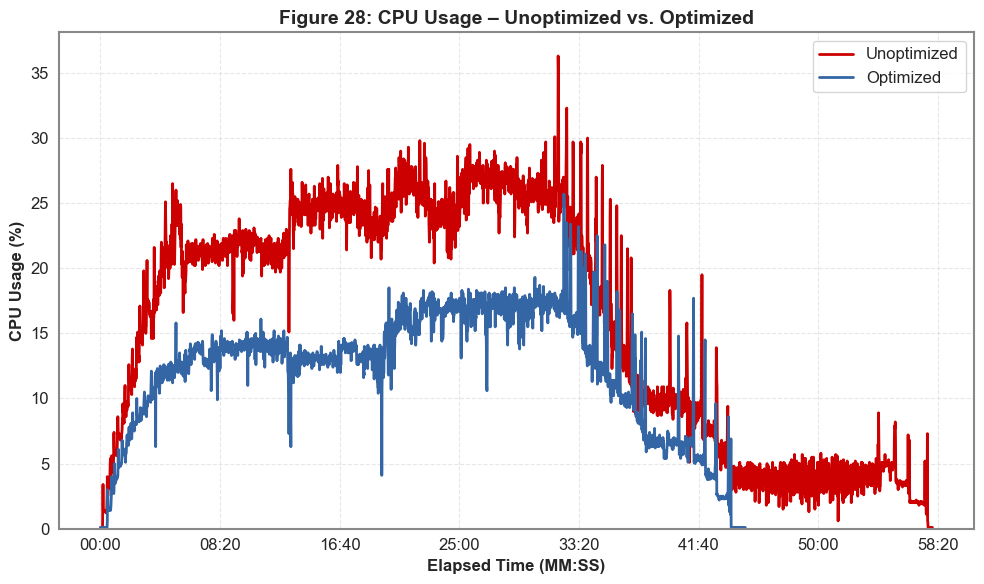

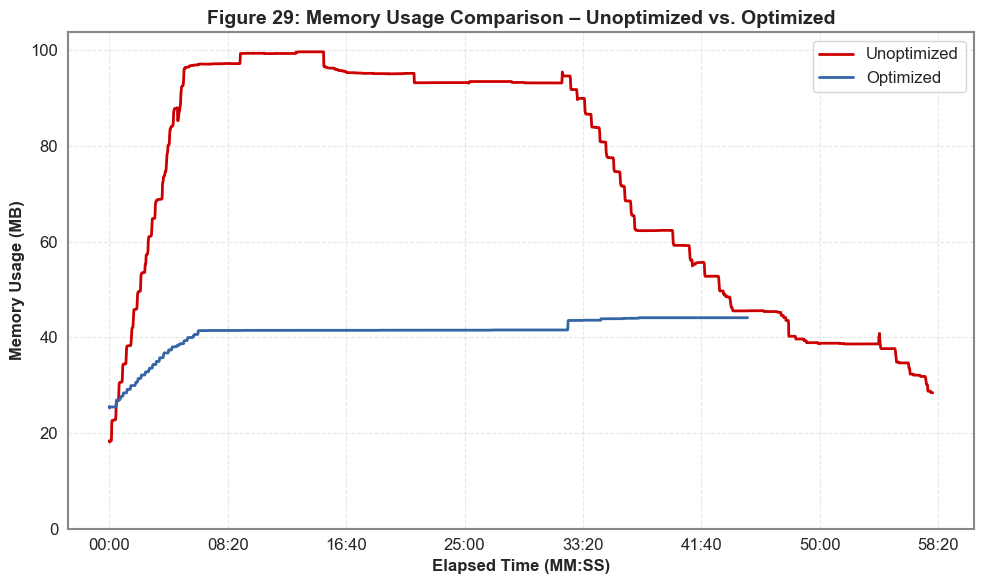

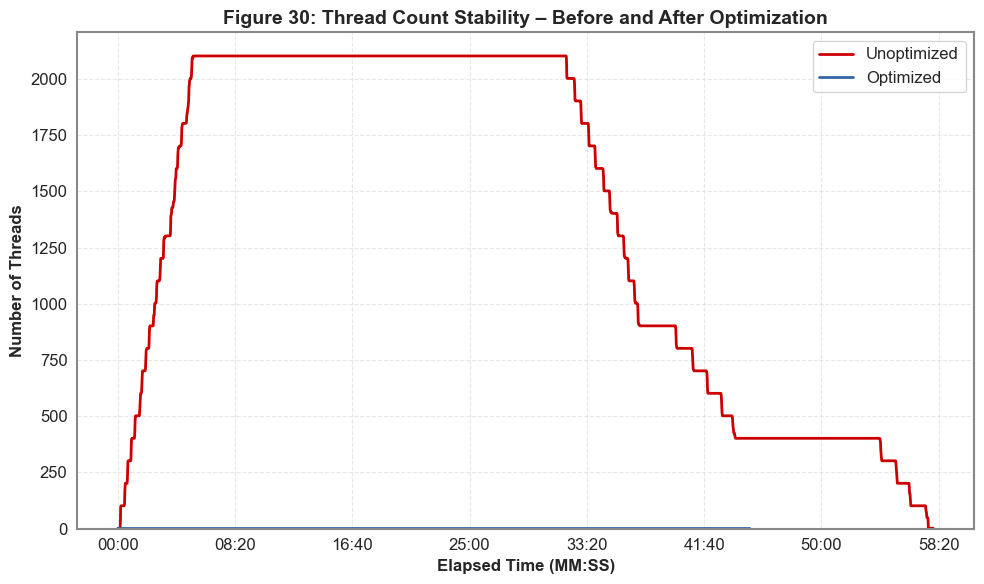

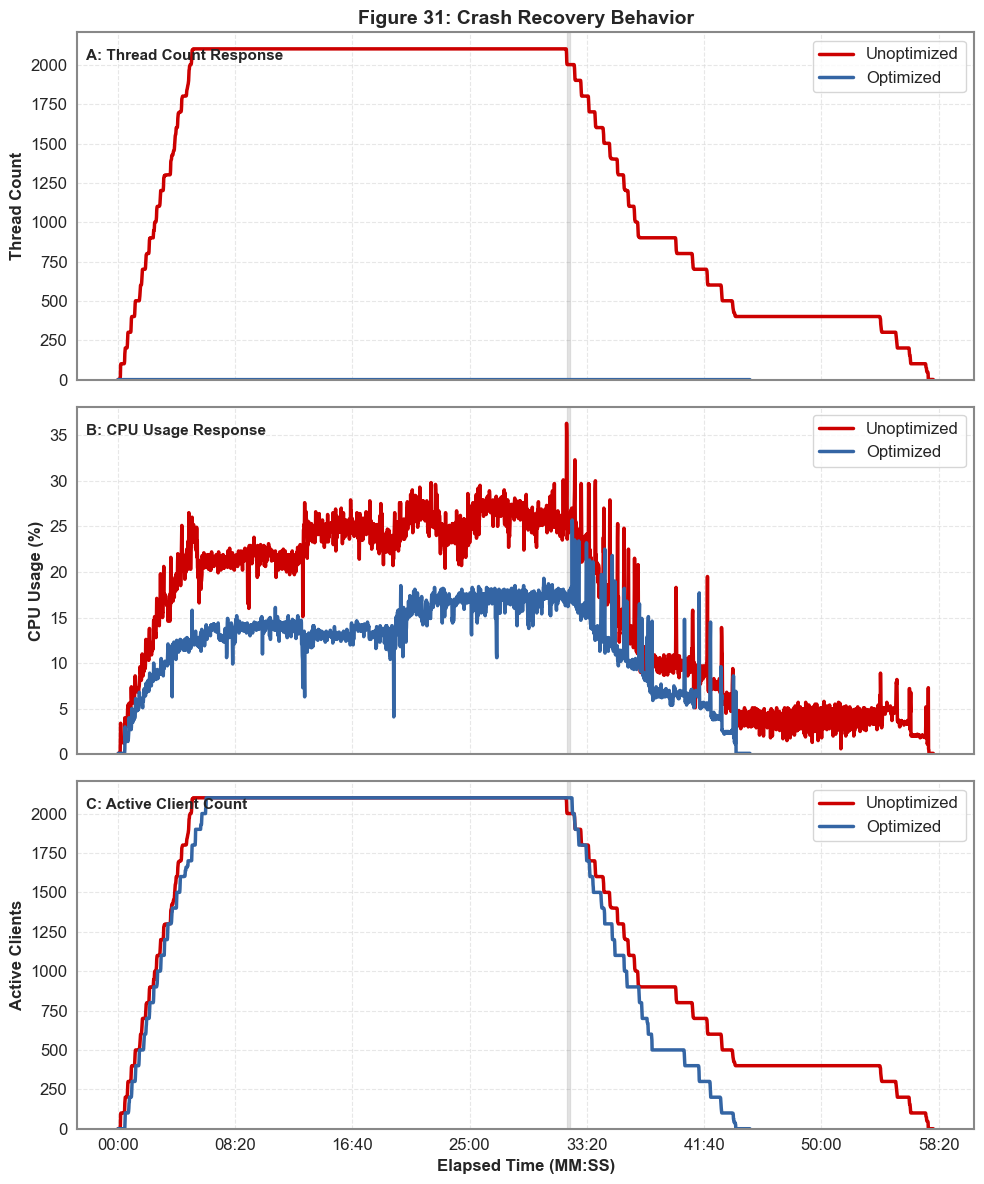


All charts have been saved as PNG files in the current directory:
- cpu_usage_comparison.png
- memory_usage_comparison.png
- thread_count_comparison.png
- crash_recovery_comparison.png


In [18]:
# Run all the plotting functions
print("\nGenerating comparative charts...")
plot_cpu_comparison()
plot_memory_comparison()
plot_thread_comparison()
plot_crash_recovery()

print("\nAll charts have been saved as PNG files in the current directory:")
print("- cpu_usage_comparison.png")
print("- memory_usage_comparison.png")
print("- thread_count_comparison.png")
print("- crash_recovery_comparison.png")